# import libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, mean_squared_error, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, mean_absolute_error, make_scorer, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier
from pipetorch import DFrame
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from scipy import stats
from seaborn import load_dataset, pairplot
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from pipetorch.evaluate.study import Study, optuna
import time
from datetime import datetime, timezone
from sklearn.linear_model import Ridge
import statsmodels.tsa.stattools as sts

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from IPython.display import display
import os
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D, Embedding
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape, Multiply, Dot, Concatenate
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
!ls /data/energie

001.xlsx  019.xlsx  037.xlsx  055.xlsx	073.xlsx  091.xlsx  109.xlsx
002.xlsx  020.xlsx  038.xlsx  056.xlsx	074.xlsx  092.xlsx  110.xlsx
003.xlsx  021.xlsx  039.xlsx  057.xlsx	075.xlsx  093.xlsx  111.xlsx
004.xlsx  022.xlsx  040.xlsx  058.xlsx	076.xlsx  094.xlsx  112.xlsx
005.xlsx  023.xlsx  041.xlsx  059.xlsx	077.xlsx  095.xlsx  113.xlsx
006.xlsx  024.xlsx  042.xlsx  060.xlsx	078.xlsx  096.xlsx  114.xlsx
007.xlsx  025.xlsx  043.xlsx  061.xlsx	079.xlsx  097.xlsx  115.xlsx
008.xlsx  026.xlsx  044.xlsx  062.xlsx	080.xlsx  098.xlsx  116.xlsx
009.xlsx  027.xlsx  045.xlsx  063.xlsx	081.xlsx  099.xlsx  117.xlsx
010.xlsx  028.xlsx  046.xlsx  064.xlsx	082.xlsx  100.xlsx  118.xlsx
011.xlsx  029.xlsx  047.xlsx  065.xlsx	083.xlsx  101.xlsx  119.xlsx
012.xlsx  030.xlsx  048.xlsx  066.xlsx	084.xlsx  102.xlsx  120.xlsx
013.xlsx  031.xlsx  049.xlsx  067.xlsx	085.xlsx  103.xlsx  unit_list.xlsx
014.xlsx  032.xlsx  050.xlsx  068.xlsx	086.xlsx  104.xlsx
015.xlsx  033.xlsx  051.xlsx  069.xlsx	087.xlsx  105

# De te gebruiken huisjes

In [167]:
wel_gebruiken= [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 22, 23, 24, 26, 28, 30, 37,
38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 60, 61, 63, 64, 66, 67, 69, 70, 
71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 83, 84, 88, 91, 92, 93, 94, 95, 98, 99, 100, 102, 104, 105, 106,
110, 112, 113, 114, 115, 116, 117, 120]

# Functie voor huisjes

Hier heb ik een functie voor het inladen van alle huisjes

Ik heb dus een kolom gemaakt met de dag en de maand van het jaar. 
Daarnaast heb ik het energeiverbruik stationaire gemaakt

In [244]:
def huisje(huis_nr):
    huis = pd.read_csv(huis_nr, index_col=0)
    huis.index = pd.to_datetime(huis.index, errors='coerce')
    huis['datum'] = huis.index
    huis['perdag_verbruik_st']= huis['perdag_verbruik'].diff()
    huis['maand'] = huis['datum'].dt.strftime('%m')
    huis['dag']= [*range(1, len(huis)+1)]
    huis= huis[['dag', 'maand', 'perdag_verbruik', 'perdag_verbruik_st']].fillna(0)
    huis= huis[:-1]
    return huis

# Datasets inladen

In [340]:
huis1= huisje('df01_perdag')
huis2= huisje('df02_perdag')
huis3= huisje('df03_perdag')
huis4= huisje('df04_perdag')
huis5= huisje('df05_perdag')
huis6= huisje('df06_perdag')
huis7= huisje('df07_perdag')
huis9= huisje('df09_perdag')
huis10= huisje('df010_perdag')
huis11= huisje('df011_perdag')
huis12= huisje('df012_perdag')
huis14= huisje('df014_perdag')
huis15= huisje('df015_perdag')
huis16= huisje('df016_perdag')
huis17= huisje('df017_perdag')
huis19= huisje('df019_perdag')
huis20= huisje('df020_perdag')
huis22= huisje('df022_perdag')
huis23= huisje('df023_perdag')
huis24= huisje('df024_perdag')
huis26= huisje('df026_perdag')
huis28= huisje('df028_perdag')
huis30= huisje('df030_perdag')
huis37= huisje('df037_perdag')
huis38= huisje('df038_perdag')
huis39= huisje('df039_perdag')
huis40= huisje('df040_perdag')
huis41= huisje('df041_perdag')
huis42= huisje('df042_perdag')
huis43= huisje('df043_perdag')
huis44= huisje('df044_perdag')
huis46= huisje('df046_perdag')
huis47= huisje('df047_perdag')
huis48= huisje('df048_perdag')
huis50= huisje('df050_perdag')
huis51= huisje('df01_perdag')
huis52= huisje('df01_perdag')
huis54= huisje('df01_perdag')
huis55= huisje('df01_perdag')
huis56= huisje('df01_perdag')
huis57= huisje('df01_perdag')
huis58= huisje('df058_perdag')
huis60= huisje('df060_perdag')
huis61= huisje('df061_perdag')
huis63= huisje('df063_perdag')
huis64= huisje('df064_perdag')
huis66= huisje('df066_perdag')
huis67= huisje('df067_perdag')
huis69= huisje('df069_perdag')
huis70= huisje('df070_perdag')
huis71= huisje('df071_perdag')
huis72= huisje('df072_perdag')
huis73= huisje('df073_perdag')
huis74= huisje('df074_perdag')
huis75= huisje('df075_perdag')
huis76= huisje('df076_perdag')
huis77= huisje('df077_perdag')
huis79= huisje('df079_perdag')
huis80= huisje('df080_perdag')
huis81= huisje('df081_perdag')
huis83= huisje('df083_perdag')
huis84= huisje('df084_perdag')
huis88= huisje('df088_perdag')
huis91= huisje('df091_perdag')
huis92= huisje('df092_perdag')
huis93= huisje('df093_perdag')
huis94= huisje('df094_perdag')
huis95= huisje('df095_perdag')
huis98= huisje('df098_perdag')
huis99= huisje('df099_perdag')
huis100= huisje('df0100_perdag')
huis102= huisje('df0102_perdag')
huis104= huisje('df0104_perdag')
huis105= huisje('df0105_perdag')
huis106= huisje('df0106_perdag')
huis110= huisje('df0110_perdag')
huis112= huisje('df0112_perdag')
huis113= huisje('df0113_perdag')
huis114= huisje('df0114_perdag')
huis115= huisje('df0115_perdag')
huis116= huisje('df0116_perdag')
huis117= huisje('df0117_perdag')
huis120= huisje('df0120_perdag')

# verbruik per dag visualiseren

/tmp/ipykernel_43694/555732226.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(huis26['dag'])


Text(0, 0.5, 'perdag verbruik')

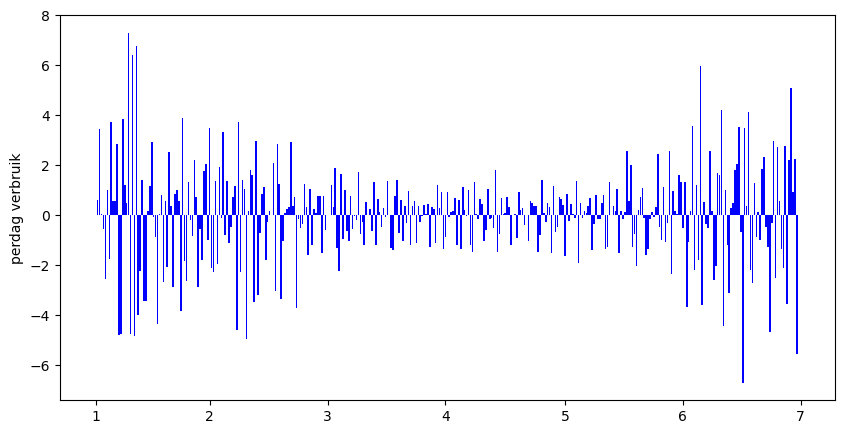

In [281]:
fig, ax= plt.subplots(figsize=(10,5))
ax.bar(huis26.index, huis26.perdag_verbruik_st, color='blue')
ax.set_xticklabels(huis26['dag'])
ax.set_ylabel('perdag verbruik')

# Weerdata inlezen en dan mergen met de dataset

In [341]:
weer = pd.read_csv('KNMI.txt')
weer= weer[weer['YYYYMMDD'] >20181231]
weer= weer[weer['YYYYMMDD'] <20200101]
weer['datum'] = weer['YYYYMMDD'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
weer= weer[['datum', '    Q']]
weer.columns= ['datum', 'zonsterkte']
weer= weer.set_index('datum')
weer

,zonsterkte
datum,
2019-01-01,161
2019-01-02,147
2019-01-03,257
2019-01-04,49
2019-01-05,56
...,...
2019-12-27,334
2019-12-28,235
2019-12-29,199


In [343]:
huis26['datum'] = pd.to_datetime(huis26.index, errors='coerce')
huis26= huis26.merge(weer, on='datum', how='inner')
huis26= huis26.set_index('datum')
huis26= huis26[['dag', 'maand', 'zonsterkte', 'perdag_verbruik', 'perdag_verbruik_st']]
huis26

,dag,maand,zonsterkte,perdag_verbruik,perdag_verbruik_st
datum,,,,,
2019-01-01,1,01,161,9.0395,0.0000
2019-01-02,2,01,147,9.6430,0.6035
2019-01-03,3,01,257,13.0820,3.4390
2019-01-04,4,01,49,13.1460,0.0640
2019-01-05,5,01,56,12.5870,-0.5590
...,...,...,...,...,...
2019-12-27,361,12,334,14.1130,5.0840
2019-12-28,362,12,235,15.0320,0.9190
2019-12-29,363,12,199,17.2900,2.2580


voor het voorspellen van energieverbruik heb ik verschillende modellen uitgeprobeerd.

Omdat dit met tijdreeksen te maken heeft, kunnen wij sws geen classificatie modellen gebruiken. De modellen die van toepassing zijn voor dit soort probleem zijn: Linear Regression, Polynomial Features, Support Vector Regression en LSTM.

In dit notebook zijn Linear Regression, Polynomial Features en Support Vector Regression toegepast op huis 26. De modellen heb ik getraind op normale en stationaire data om te kijken waarop de beste resultaten komen.

# Linear Regression

trainen op normale data

model score:  0.4822308975951086
validation error:  2.8933965189240305
intercept:  12.018539619232811
coefficients:  [-0.00293397  0.00846628 -0.55850282]


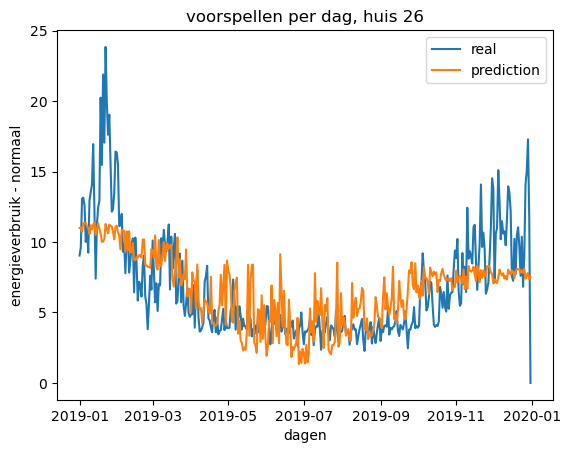

In [351]:
lr= LinearRegression()
X= huis26[['zonsterkte', 'dag', 'maand']].values
y= huis26['perdag_verbruik'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
lr.fit(X_train, y_train)
prediction= lr.predict(X_test)
score= lr.score(X_test, y_test)
validation_error = sqrt(mean_squared_error(prediction, y_test))

plt.title('voorspellen per dag, huis 26')
plt.plot(huis26.index, y, label='real')
plt.plot(huis26.index, lr.predict(X), label='prediction')
plt.xlabel('dagen')
plt.ylabel('energieverbruik - normaal')
plt.legend()

print('model score: ', score)
print('validation error: ', validation_error)
print('intercept: ', lr.intercept_)
print('coefficients: ', lr.coef_)

trainen op stationaire data

model score:  0.12580552259388444
validation error:  1.9726310937634108
intercept:  -2.3381350782589703
coefficients:  [-0.00177233  0.0848002   0.00063967  0.21179579]


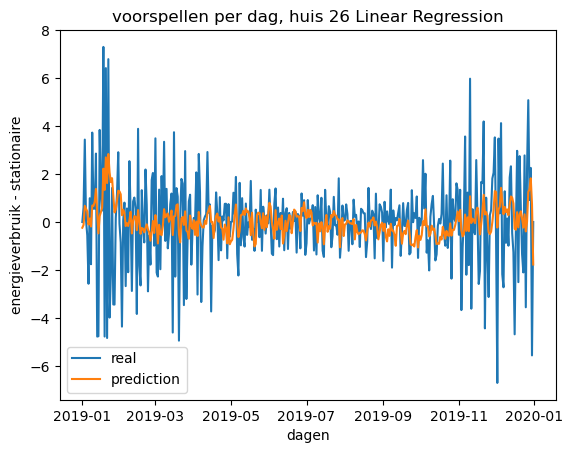

In [350]:
lr= LinearRegression()
X= huis26.drop('perdag_verbruik_st', axis=1).values
y= huis26['perdag_verbruik_st'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
lr.fit(X_train, y_train)
prediction= lr.predict(X_test)
score= lr.score(X_test, y_test)
validation_error = sqrt(mean_squared_error(prediction, y_test))

plt.title('voorspellen per dag, huis 26 Linear Regression')
plt.plot(huis26.index, y, label='real')
plt.plot(huis26.index, lr.predict(X), label='prediction')
plt.xlabel('dagen')
plt.ylabel('energieverbruik - stationaire')
plt.legend()

print('model score: ', score)
print('validation error: ', validation_error)
print('intercept: ', lr.intercept_)
print('coefficients: ', lr.coef_)

# Polynomial Features

score:  0.4616551182937678


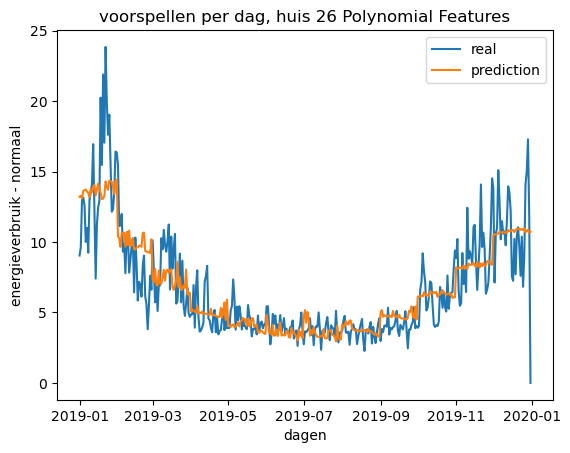

In [349]:
X = huis26.iloc[:, :3].values  
y = huis26.iloc[:, 3].values

lin_reg = LinearRegression()
lin_reg.fit(X,y)
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

print('score: ', lin_reg.score(X, y))

plt.plot(huis26.index, y, label='real')
plt.plot(huis26.index, lin_reg2.predict(X_poly), label='prediction')
plt.title('voorspellen per dag, huis 26 Polynomial Features')
plt.xlabel('dagen')
plt.ylabel('energieverbruik - normaal')
plt.legend()

score:  0.1186912566596422


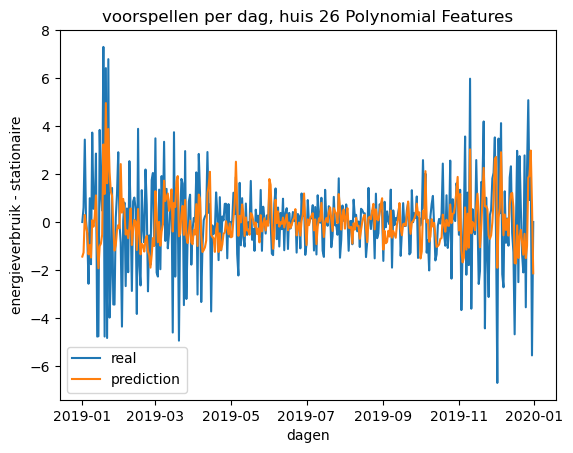

In [352]:
X = huis26.iloc[:, :4].values  
y = huis26.iloc[:, 4].values

lin_reg = LinearRegression()
lin_reg.fit(X,y)
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

print('score: ', lin_reg.score(X, y))

plt.plot(huis26.index, y, label='real')
plt.plot(huis26.index, lin_reg2.predict(X_poly), label='prediction')
plt.title('voorspellen per dag, huis 26 Polynomial Features')
plt.xlabel('dagen')
plt.ylabel('energieverbruik - stationaire')
plt.legend()

# per uur proberen te voorspellen

In [356]:
df26uur= pd.read_csv('df026_per1uur', index_col=0)
df26uur['datum']= df26uur.index
df26uur= df26uur[['datum', 'perdag_verbruik']]
df26uur['datum'] = pd.to_datetime(df26uur.index, errors='coerce')
df26uur['maand'] = df26uur['datum'].dt.strftime('%m')
df26uur = df26uur[['datum', 'maand', 'perdag_verbruik']]

df26uur

,datum,maand,perdag_verbruik
2019-01-01 00:00:00,2019-01-01 00:00:00,01,0.4895
2019-01-01 01:00:00,2019-01-01 01:00:00,01,1.2425
2019-01-01 02:00:00,2019-01-01 02:00:00,01,0.1390
2019-01-01 03:00:00,2019-01-01 03:00:00,01,0.1375
2019-01-01 04:00:00,2019-01-01 04:00:00,01,0.1390
...,...,...,...
2019-12-31 20:00:00,2019-12-31 20:00:00,12,0.6065
2019-12-31 21:00:00,2019-12-31 21:00:00,12,0.6705
2019-12-31 22:00:00,2019-12-31 22:00:00,12,0.2400
2019-12-31 23:00:00,2019-12-31 23:00:00,12,NaN


In [357]:
weer = pd.read_csv('KNMI.txt')
weer= weer[weer['YYYYMMDD'] >20181231]
weer= weer[weer['YYYYMMDD'] <20200101]
weer['datum'] = weer['YYYYMMDD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

weer= weer.set_index('datum')
weer['    Q'] = weer['    Q'].astype(int)
new_range = pd.date_range(np.datetime64('2019-01-01T00:00:00.000000000'), np.datetime64('2020-01-01T00:00:00.000000000'), freq='1H')
weer_datum= weer.index
weerinterpol = weer.reindex(weer_datum.union(new_range)).interpolate(method='linear', limit_direction='backward').loc[new_range]
weerinterpol['datum']= weerinterpol.index
weer2= weerinterpol[['datum', '    Q']]
weer2= weer2.rename({'    Q':'zonsterkte'}, axis=1)
weer2

,datum,zonsterkte
2019-01-01 00:00:00,2019-01-01 00:00:00,161.000000
2019-01-01 01:00:00,2019-01-01 01:00:00,160.416667
2019-01-01 02:00:00,2019-01-01 02:00:00,159.833333
2019-01-01 03:00:00,2019-01-01 03:00:00,159.250000
2019-01-01 04:00:00,2019-01-01 04:00:00,158.666667
...,...,...
2019-12-31 20:00:00,2019-12-31 20:00:00,NaN
2019-12-31 21:00:00,2019-12-31 21:00:00,NaN
2019-12-31 22:00:00,2019-12-31 22:00:00,NaN
2019-12-31 23:00:00,2019-12-31 23:00:00,NaN


In [358]:
df26uur= df26uur.merge(weer2, on='datum', how='inner').dropna()
df26uur= df26uur[['datum', 'maand', 'zonsterkte', 'perdag_verbruik']]
df26uur= df26uur.set_index('datum')
df26uur

,maand,zonsterkte,perdag_verbruik
datum,,,
2019-01-01 00:00:00,01,161.000000,0.4895
2019-01-01 01:00:00,01,160.416667,1.2425
2019-01-01 02:00:00,01,159.833333,0.1390
2019-01-01 03:00:00,01,159.250000,0.1375
2019-01-01 04:00:00,01,158.666667,0.1390
...,...,...,...
2019-12-30 20:00:00,12,312.833333,0.5700
2019-12-30 21:00:00,12,310.375000,0.8500
2019-12-30 22:00:00,12,307.916667,0.6310


In [359]:
df26uur.isnull().sum()

maand              0
zonsterkte         0
perdag_verbruik    0
dtype: int64

prediction:  [0.37511912 0.3977588  0.14782155 ... 0.35600289 0.20481542 0.13352048]
model score:  0.10790427644396416
validation error:  0.33298137377570636
intercept:  0.5034861310056093
coefficients:  [-0.01145945 -0.00013407]


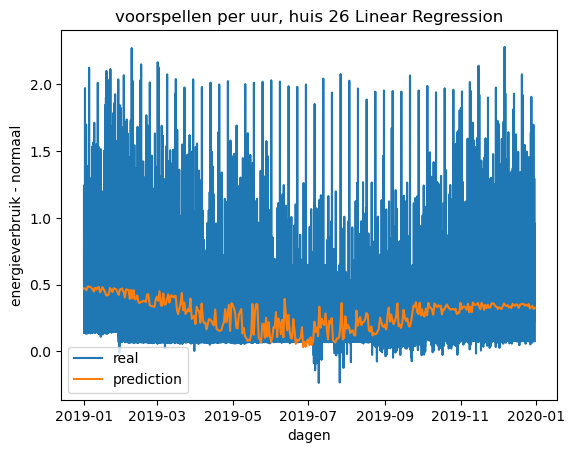

In [361]:
X = df26uur[['maand', 'zonsterkte']].values
y = df26uur['perdag_verbruik'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score= lr.score(X_test, y_test)
validation_error = sqrt(mean_squared_error(y_pred, y_test))

plt.plot(df26uur.index, y, label='real')
plt.plot(df26uur.index, lr.predict(X), label='prediction')
plt.title('voorspellen per uur, huis 26 Linear Regression')
plt.xlabel('dagen')
plt.ylabel('energieverbruik - normaal')
plt.legend()

print('prediction: ', y_pred)
print('model score: ', score)
print('validation error: ', validation_error)
print('intercept: ', lr.intercept_)
print('coefficients: ', lr.coef_)

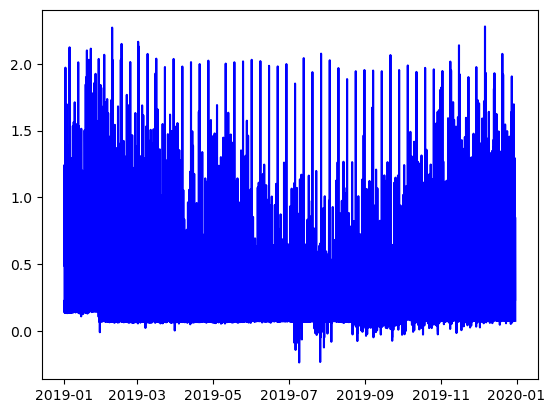

In [362]:
plt.plot(df26uur.index, df26uur['perdag_verbruik'], color='blue')

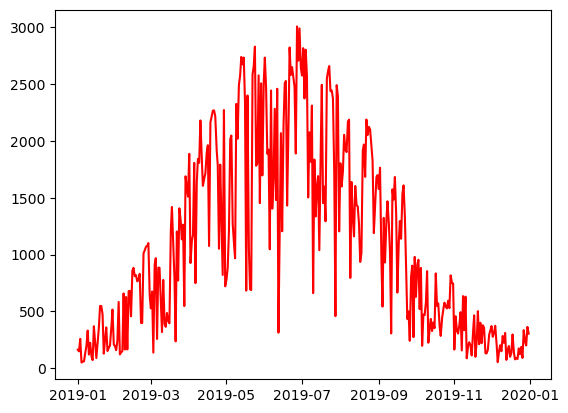

In [363]:
plt.plot(df26uur.index, df26uur['zonsterkte'], color='red')

In [364]:
from sklearn.preprocessing import StandardScaler
X= df26uur.iloc[:, 0:2].values
y= df26uur.iloc[:, 2].values
y= y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [365]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/opt/jupyterhub/anaconda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [366]:
y_pred = regressor.predict(X_test)
y_pred= y_pred.reshape(-1,1)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([[0.19729138],
       [0.19729138],
       [0.19729138],
       ...,
       [0.19729138],
       [0.19729138],
       [0.19729138]])

In [367]:
regressor.score(X_test, y_test)

-2.3178829019910365

# Support Vector Regression

In [368]:
X= huis26.iloc[:, :2].values
y= huis26.iloc[:, 2].values
y= y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

model score:  -1.6258024204184087
mean squared error:  0.2928820271594056
validation error:  743.2701782163771


/opt/jupyterhub/anaconda/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


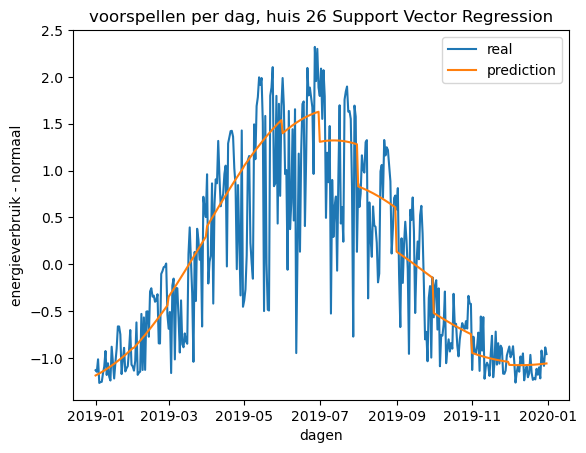

In [369]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
y_pred = regressor.predict(X_test).reshape(-1,1)
y_pred = sc_y.inverse_transform(y_pred)
score= regressor.score(X_test, y_test)
mse= mean_squared_error(y, regressor.predict(X))
validation_error = sqrt(mean_squared_error(y_pred, y_test))

plt.plot(huis26.index, y, label='real')
plt.plot(huis26.index, regressor.predict(X), label='prediction')
plt.title('voorspellen per dag, huis 26 Support Vector Regression')
plt.xlabel('dagen')
plt.ylabel('energieverbruik - normaal')
plt.legend()

print('model score: ', score)
print('mean squared error: ', mse)
print('validation error: ', validation_error)

# Polynomial Features

In [370]:
lr26= LinearRegression()
X= huis26.drop('perdag_verbruik_st', axis=1).values
y= huis26['perdag_verbruik_st'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
lr26.fit(X_train, y_train)
prediction= lr26.predict(X_test)
score= lr26.score(X_test, y_test)
print('model score: ', score)

poly = PolynomialFeatures(degree = 6)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

lin2 = LinearRegression()
lin2.fit(X_poly, y)

predict_lin = lr26.predict(X)
predict_lin2 = lin2.predict(poly.fit_transform(X))

mse= mean_squared_error(y, predict_lin2)

print('mean squared error: ', mse)

model score:  0.12580552259388444
mean squared error:  1.968473734802207


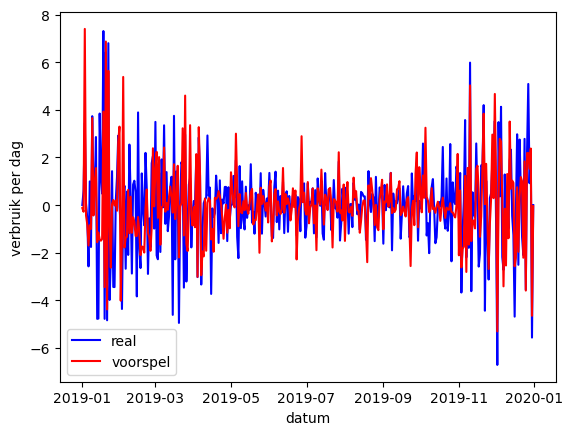

In [371]:
plt.plot(huis26.index, y, color='blue', label='real')
plt.plot(huis26.index, predict_lin2, color='red', label='voorspel')
plt.xlabel('datum')
plt.ylabel('verbruik per dag')
plt.legend()

# huis 26 voorspellen, met dummies

met stationaire data

In [287]:
huis026= pd.get_dummies(huis26.loc[:,['maand', 'dag']], columns = ['maand', 'dag'])
huis026= pd.concat([huis026, huis26.loc[:,['perdag_verbruik_st']]], axis=1)

In [383]:
huis026

,maand_01,maand_02,maand_03,maand_04,maand_05,maand_06,maand_07,maand_08,maand_09,maand_10,...,dag_357,dag_358,dag_359,dag_360,dag_361,dag_362,dag_363,dag_364,dag_365,perdag_verbruik_st
datum,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0000
2019-01-02,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.6035
2019-01-03,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.4390
2019-01-04,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0640
2019-01-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.5590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.0840
2019-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.9190
2019-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.2580


R2_score: -0.140
MAE: 1.601
MSE: 4.581


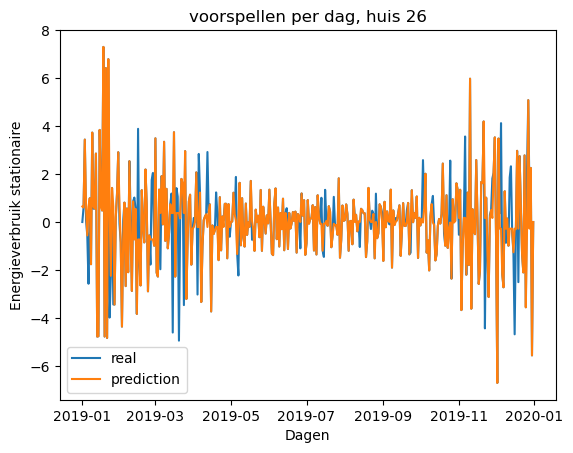

In [288]:
X= huis026.drop('perdag_verbruik_st', axis=1).values
y= huis026['perdag_verbruik_st'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
print('R2_score: %.3f' % (r2_score(y_test, y_pred)))
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))

plt.title('voorspellen per dag, huis 26')
plt.plot(huis026.index, y, label='real')
plt.plot(huis026.index, lr.predict(X), label='prediction')
plt.xlabel('Dagen')
plt.ylabel('Energieverbruik stationaire')
plt.legend()

-0.13957119480102675


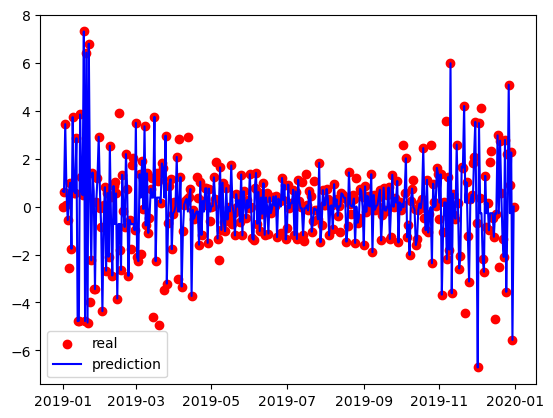

In [289]:
plt.scatter(huis026.index, y, color='red', label='real')
plt.plot(huis026.index, lr.predict(X), color='blue', label='prediction')
plt.legend()
print(r2_score(y_test, y_pred))

met normale data

In [374]:
huis026new= pd.get_dummies(huis26.loc[:,['maand', 'dag']], columns = ['maand', 'dag'])
huis026new= pd.concat([huis026new, huis26.loc[:,['perdag_verbruik']]], axis=1)

R2_score: 0.713
MAE: 1.528
MSE: 4.289


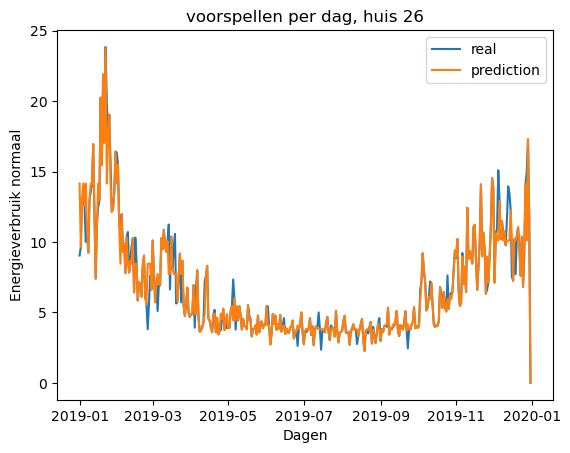

In [375]:
X= huis026new.drop('perdag_verbruik', axis=1).values
y= huis026new['perdag_verbruik'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
print('R2_score: %.3f' % (r2_score(y_test, y_pred)))
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))

plt.title('voorspellen per dag, huis 26')
plt.plot(huis026new.index, y, label='real')
plt.plot(huis026new.index, lr.predict(X), label='prediction')
plt.xlabel('Dagen')
plt.ylabel('Energieverbruik normaal')
plt.legend()

# huis 116, met dummies

In [376]:
huis0116= pd.get_dummies(huis116.loc[:,['maand', 'dag']], columns = ['maand', 'dag'])
huis0116= pd.concat([huis0116, huis116.loc[:,['perdag_verbruik']]], axis=1)

R2 score:  0.5031000940677433


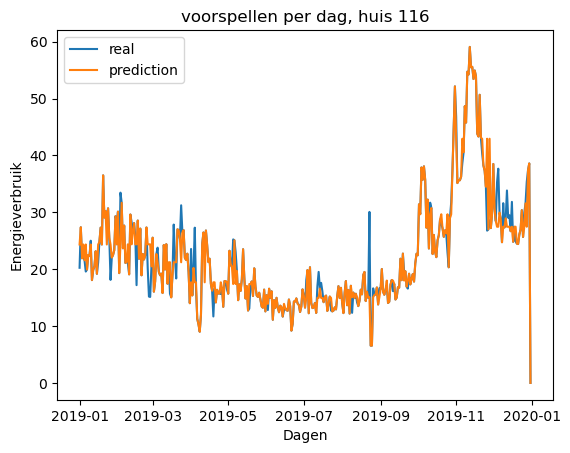

In [377]:
X= huis0116.drop('perdag_verbruik', axis=1).values
y= huis0116['perdag_verbruik'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))
plt.title('voorspellen per dag, huis 116')
plt.plot(huis0116.index, y, label='real')
plt.plot(huis0116.index, lr.predict(X), label='prediction')
plt.xlabel('Dagen')
plt.ylabel('Energieverbruik')
plt.legend()

# dummies peruur

In [378]:
df26uur= pd.read_csv('df026_per1uur', index_col=0).dropna()
df26uur['datum'] = pd.to_datetime(df26uur.index, errors='coerce')
df26uur['maand'] = df26uur['datum'].dt.strftime('%m')
df26uur.rename({'perdag_verbruik':'peruur_verbruik'}, axis=1, inplace=True, errors='ignore')
df26uur= df26uur[['maand', 'peruur_verbruik', 'datum']]
df26uur

,maand,peruur_verbruik,datum
2019-01-01 00:00:00,01,0.4895,2019-01-01 00:00:00
2019-01-01 01:00:00,01,1.2425,2019-01-01 01:00:00
2019-01-01 02:00:00,01,0.1390,2019-01-01 02:00:00
2019-01-01 03:00:00,01,0.1375,2019-01-01 03:00:00
2019-01-01 04:00:00,01,0.1390,2019-01-01 04:00:00
...,...,...,...
2019-12-31 18:00:00,12,0.6720,2019-12-31 18:00:00
2019-12-31 19:00:00,12,0.2100,2019-12-31 19:00:00
2019-12-31 20:00:00,12,0.6065,2019-12-31 20:00:00
2019-12-31 21:00:00,12,0.6705,2019-12-31 21:00:00


In [379]:
df26uur['dag'] = 0
df26uur['uur'] = 0
for i in range(len(df26uur)):
    df26uur['dag'][i] = df26uur['datum'][i].timetuple().tm_yday
    df26uur['uur'][i] = df26uur['datum'][i].hour

/tmp/ipykernel_43694/2567359038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df26uur['dag'][i] = df26uur['datum'][i].timetuple().tm_yday
/tmp/ipykernel_43694/2567359038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df26uur['uur'][i] = df26uur['datum'][i].hour


In [380]:
df26uur= df26uur[['maand', 'dag', 'uur', 'peruur_verbruik']]

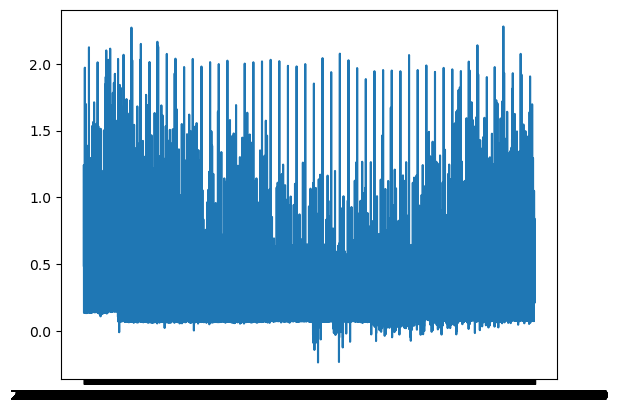

In [381]:
plt.plot(df26uur.index, df26uur.peruur_verbruik)

In [382]:
df26dum= pd.get_dummies(df26uur.loc[:,['maand', 'dag', 'uur']], columns = ['maand', 'dag', 'uur'])
df26dum= pd.concat([df26dum, df26uur.loc[:,['peruur_verbruik']]], axis=1)

R2 score:  0.2290703855147671


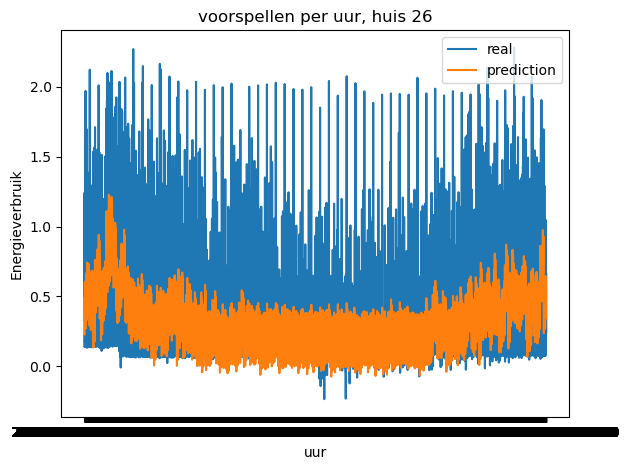

In [422]:
X= df26dum.drop('peruur_verbruik', axis=1).values
y= df26dum['peruur_verbruik'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))
plt.title('voorspellen per uur, huis 26')
plt.plot(df26dum.index, y, label='real')
plt.plot(df26dum.index, lr.predict(X), label='prediction')
plt.xlabel('uur')
plt.ylabel('Energieverbruik')
plt.legend()

# kijken naar de scores van alle huisjes

In [449]:
def scores(huisnr):
    
    r2_list = []
    mse_list = []
    mae_list = []

    for i in wel_gebruiken:
        huis = 'df0' + str(i) + '_perdag'
        df = pd.read_csv(huis, index_col=0)

        df.index = pd.to_datetime(df.index, errors='coerce')
        df['datum'] = df.index
        df['perdag_verbruik_st']= df['perdag_verbruik'].diff()
        df['maand'] = df['datum'].dt.strftime('%m')
        df['dag']= [*range(1, len(df)+1)]
        df= df[['dag', 'maand', 'perdag_verbruik', 'perdag_verbruik_st']].fillna(0)
        df= df[:-1]

        X= df[['dag', 'maand']]
        y= df['perdag_verbruik_st']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lr= LinearRegression()
        lr.fit(X_train, y_train)
        y_pred= lr.predict(X_test)


        r2 = r2_score(y_test, y_pred)
        MAE = mean_absolute_error(y_test, y_pred)
        MSE = mean_squared_error(y_test, y_pred)

        r2_list.append(r2)
        mae_list.append(MAE)
        mse_list.append(MSE)

        return(f'R2: {(r2_list)}', f'MAE: {(mae_list)}', f'MSE: {(mse_list)}')

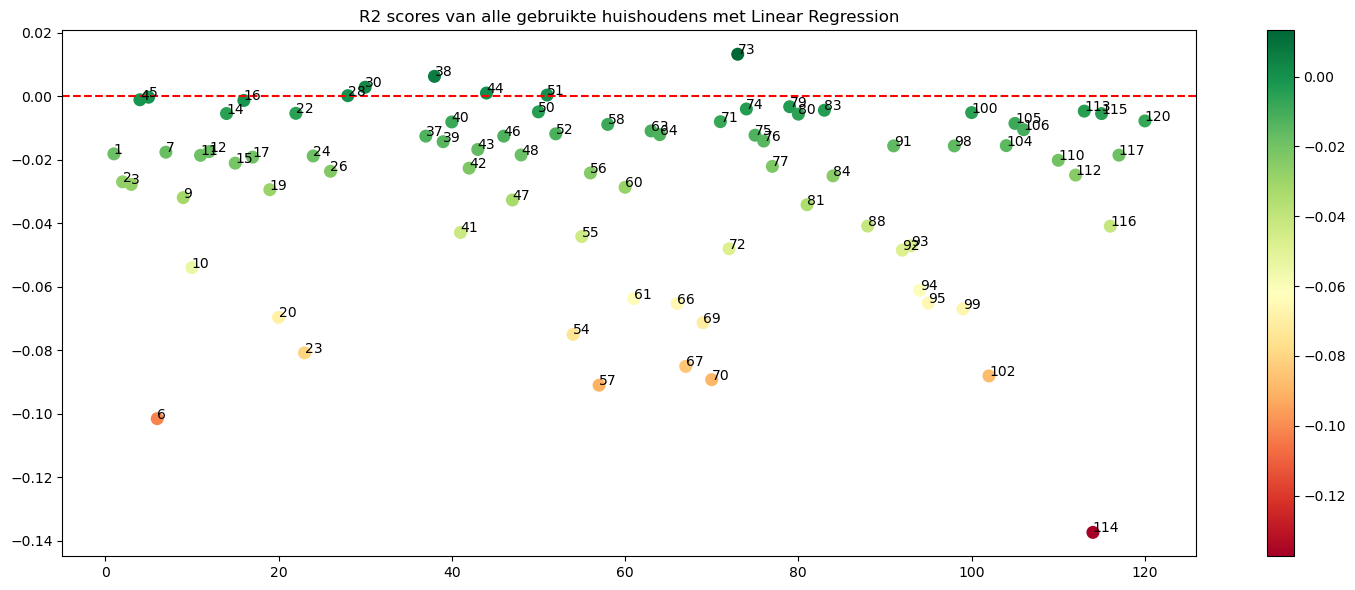

In [452]:
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, figsize=(15,6))
points = ax.scatter(wel_gebruiken, r2_list, c=r2_list, s=70, cmap='RdYlGn')
fig.colorbar(points)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_title('R2 scores van alle gebruikte huishoudens met Linear Regression')
for i, txt in enumerate(wel_gebruiken):
    ax.annotate(txt, (wel_gebruiken[i], r2_list[i]))

In [419]:
max(r2_list), min(r2_list)

(0.013269543465588396, -0.13739559161686432)

In [420]:
max(mae_list), min(mae_list)

(6.834356322475865, 1.454185992476752)

In [421]:
max(mse_list), min(mse_list)

(83.96527217776291, 3.565212425657668)

In [450]:
scores(26)

('R2: [-0.018123437208521498]',
 'MAE: [3.606614107998133]',
 'MSE: [30.837968449648354]')

In [451]:
scores(73)

('R2: [-0.018123437208521498]',
 'MAE: [3.606614107998133]',
 'MSE: [30.837968449648354]')